<a href="https://colab.research.google.com/github/gswiggle/Face-Detector/blob/main/Week1%2B2_OpenAvenues.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Javascript, Image
from google.colab.patches import cv2_imshow
from base64 import b64decode, b64encode
from IPython.display import display, Javascript
from google.colab.output import eval_js
import cv2
import numpy as np
import PIL
import io
import html
import time

In [ ]:

def makeasquare(image, upperleft, bottomright, color,thickness):
  img = cv2.imread(image)

  img = cv2.rectangle(img, upperleft, bottomright, color, thickness)
  cv2_imshow(img)
  	
  cv2.waitKey(0)
  cv2.destroyAllWindows()

In [ ]:
def js_to_image(js_reply):
  image_bytes = b64decode(js_reply.split(',')[1])
  jpg_as_np = np.frombuffer(image_bytes, dtype = np.uint8)
  img1 = cv2.imdecode(jpg_as_np, flags = 1)
  return img1

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))

In [ ]:

def photo_shot(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
# initialize the Haar Cascade face detection model
face_cascade = cv2.CascadeClassifier(cv2.samples.findFile(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'))
photo_shot()

<IPython.core.display.Javascript object>

'photo.jpg'

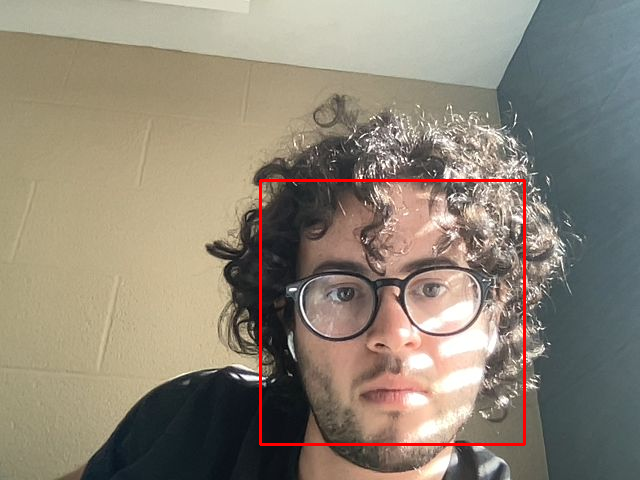

In [ ]:
def draw_face_boxes(image):
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces: 
      cv2.rectangle(image, (x,y), (x+w, y+h), (0,0, 255), 2)
    cv2_imshow(image)

image = cv2.imread('photo.jpg')
draw_face_boxes(image)

<IPython.core.display.Javascript object>

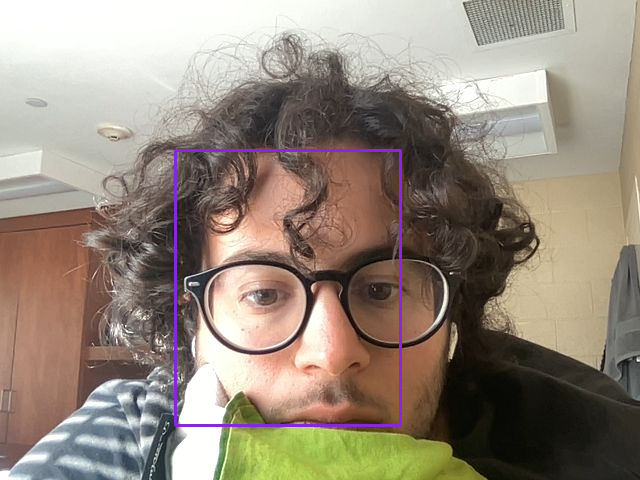

In [ ]:
#testing of functions
image = 'photo.jpg'
upperleft = (175,150)
bottomright = (400,425)
color = (220, 40, 136)
thickness = 2
photo_shot()
#data = eval_js('takePhoto({})'.format(0.8))
#img = js_to_image(data)
#gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#print(gray.shape)
#faces= face_cascade.detectMultiScale(gray)
#for(x,y,w,h) in faces:
#  makeasquare(img,(x,y),(x+w,y+h),(200,100,20),2)
#cv2.imwrite(filename,img)
makeasquare(image, upperleft, bottomright, color, thickness)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Downloads/wiki_crop
import os
files = os.listdir()
print(files)
 https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz


Mounted at /content/drive
[Errno 2] No such file or directory: '/content/drive/MyDrive/Downloads/wiki_crop'
/content
['.config', 'photo.jpg', 'drive', 'sample_data']


In [ ]:
!wget https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz -P /content/drive/MyDrive/OpenAvenues/

--2023-03-24 21:35:35--  https://data.vision.ee.ethz.ch/cvl/rrothe/imdb-wiki/static/wiki.tar.gz
Resolving data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)... 129.132.52.178, 2001:67c:10ec:36c2::178
Connecting to data.vision.ee.ethz.ch (data.vision.ee.ethz.ch)|129.132.52.178|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3157487479 (2.9G) [application/x-gzip]
Saving to: ‘/content/drive/MyDrive/OpenAvenues/wiki.tar.gz’

wiki.tar.gz         100%[===================>]   2.94G  26.8MB/s    in 1m 50s  

2023-03-24 21:37:26 (27.5 MB/s) - ‘/content/drive/MyDrive/OpenAvenues/wiki.tar.gz’ saved [3157487479/3157487479]



In [ ]:
!tar -xvf /content/drive/MyDrive/OpenAvenues/wiki.tar.gz -C /content/drive/MyDrive/OpenAvenues

Streaming output truncated to the last 5000 lines.
wiki/50/8653450_1985-11-28_2014.jpg
wiki/50/28040650_1986-04-20_2011.jpg
wiki/50/1896450_1928-03-22_1990.jpg
wiki/50/39477450_1965-01-04_2014.jpg
wiki/50/17106250_1950-02-23_2010.jpg
wiki/50/17508150_1986-04-22_2012.jpg
wiki/50/15701850_1986-04-15_2010.jpg
wiki/50/28037450_1934-07-09_2002.jpg
wiki/50/14040750_1989-10-04_2008.jpg
wiki/50/28991050_1964-08-19_2010.jpg
wiki/50/27962750_1894-03-20_1946.jpg
wiki/50/29127850_1923-11-05_2007.jpg
wiki/50/33309450_1989-04-27_2012.jpg
wiki/50/20291650_1987-02-18_2014.jpg
wiki/50/2529850_1922-12-05_1966.jpg
wiki/50/42305150_1954-07-11_1950.jpg
wiki/50/22659150_1890-11-01_1962.jpg
wiki/50/29569950_1978-04-28_1999.jpg
wiki/50/7720450_1956-07-18_2010.jpg
wiki/50/7973150_1985-10-07_2009.jpg
wiki/50/2744250_1981-01-17_2010.jpg
wiki/50/166450_1927-06-15_1989.jpg
wiki/50/35796450_1936-01-21_1973.jpg
wiki/50/43761250_1941-04-20_1960.jpg
wiki/50/38389550_1970-03-25_1996.jpg
wiki/50/683150_1986-06-27_2007.j

In [ ]:
!ls /content/drive/MyDrive/OpenAvenues/wiki/00

10049200_1891-09-16_1958.jpg  3258100_1982-07-07_2011.jpg
10110600_1985-09-17_2012.jpg  32633400_1980-03-17_2010.jpg
10126400_1964-07-07_2010.jpg  32633900_1985-03-01_2009.jpg
1013900_1917-10-15_1960.jpg   32787100_1982-02-16_2011.jpg
10166400_1960-03-12_2008.jpg  32842900_1984-06-17_1980.jpg
102100_1970-10-09_2008.jpg    328700_1959-08-10_2012.jpg
1024100_1982-06-07_2011.jpg   32883800_1990-06-19_2007.jpg
10292500_1984-03-26_2009.jpg  3293900_1973-09-23_2004.jpg
1035700_1945-11-27_2013.jpg   32955900_1970-01-21_2014.jpg
10416800_1907-01-08_1967.jpg  33034300_1995-11-06_2014.jpg
10525500_1916-02-14_1951.jpg  33051600_1969-10-02_2011.jpg
1054800_1947-09-19_2011.jpg   3308200_1964-06-11_1986.jpg
10623500_1931-09-25_1956.jpg  33100400_1980-04-25_2011.jpg
10726900_1991-02-03_2010.jpg  3316300_1970-06-10_2012.jpg
10870400_1971-06-28_2013.jpg  33264600_1993-10-13_2012.jpg
10898800_1951-06-03_1950.jpg  33276000_1978-07-09_2007.jpg
10967900_1956-03-18_2007.jpg  33348100_1971-07-28_2014.jpg
109

In [ ]:
def intersection_over_union(box_a,box_b):
  # Determine the coordinates of each of the two boxes
  xA = max(box_a['left'], box_b['left'])
  yA = max(box_a['top'], box_b['top'])
  xB = min(box_a['left']+box_a['width'], box_b['left']+box_b['width'])
  yB = min(box_a['top']+box_a['height'], box_b['top']+box_b['height'])
    
  # Calculate the area of the intersection area
  area_of_intersection = (xB - xA + 1) * (yB - yA + 1)
 
  # Calculate the area of both rectangles
  box_a_area = (box_a['width'] + 1) * (box_a['height'] + 1)
  box_b_area = (box_b['width'] + 1) * (box_b['height'] + 1)
  # Calculate the area of intersection divided by the area of union
  # Area of union = sum both areas less the area of intersection
  iou = area_of_intersection / float(box_a_area + box_b_area - area_of_intersection)
 
 # Return the score
  return iou

In [ ]:
import scipy.io
mat = scipy.io.loadmat("/content/drive/MyDrive/OpenAvenues/wiki/wiki.mat")
face_location = mat['wiki']
print(face_location.dtype)
print(face_location.size)
print(face_location.shape)
face_location['face_location'][0, 0]

[('dob', 'O'), ('photo_taken', 'O'), ('full_path', 'O'), ('gender', 'O'), ('name', 'O'), ('face_location', 'O'), ('face_score', 'O'), ('second_face_score', 'O')]
1
(1, 1)


array([[array([[111.29109473, 111.29109473, 252.66993082, 252.66993082]]),
        array([[252.4833023 , 126.68165115, 354.53192596, 228.73027481]]),
        array([[113.52, 169.84, 366.08, 422.4 ]]), ...,
        array([[169.88839786,  74.31669472, 235.2534231 , 139.68171997]]),
        array([[1, 1, 1, 1]], dtype=uint8),
        array([[ 92.72633235,  62.0435549 , 230.12083087, 199.43805342]])]],
      dtype=object)

In [1]:
import os
from os import listdir
folder = cv2.imread("/content/drive/MyDrive/OpenAvenues/wiki/00")
avgscore = 0.0
numiteration = 0
for images in os.listdir(folder):
  iou = intersection_over_union(faces, )
  numiteration += 1
  avgscore += iou

avgscore /= numiteration
print(avgscore)

NameError: ignored